In [ ]:
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [ ]:
df = pd.read_csv("/content/Amazon_reviews.csv")

In [ ]:
df.head()

,user_name,ratings,comment,time,user_product_description,state,description,user_URL,product_URL
0,Kavyashree D N,5.0 out of 5 stars,Comfortable,Reviewed in India on 14 December 2022,Size: 5 UKColour: Black,Verified Purchase,It will give you nice look and it’s very comfo...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Womens-Stylish-Comfort-S...
1,Kavyashree D N,4.0 out of 5 stars,Product is good,Reviewed in India on 14 December 2022,Colour: BlackSize: M,Verified Purchase,Product is good and comfortable but I am givin...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Fort-Collins-Womens-Swea...
2,Kavyashree D N,5.0 out of 5 stars,Best product,Reviewed in India on 22 July 2022,NaN,NaN,Quality is fine. Chain and the stones are look...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Jixara-Wearing-Necklace-...
3,Amazon Customer,4.0 out of 5 stars,Good quality product...if want little loose go...,Reviewed in India on 3 November 2022,Colour: NavySize: L,Verified Purchase,"Production is very good, better value for mone...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Qube-Fort-Collins-Sweats...
4,Amazon Customer,1.0 out of 5 stars,"Hang after 7 days, defective piece received",Reviewed in India on 3 November 2022,NaN,Verified Purchase,I am not even moderate user still hang while u...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/OnePlus-Prime-128GB-Stor...


In [ ]:
# converting into lower case

df['description'] = df['description'].str.lower()

In [ ]:
df.head()

,user_name,ratings,comment,time,user_product_description,state,description,user_URL,product_URL
0,Kavyashree D N,5.0 out of 5 stars,Comfortable,Reviewed in India on 14 December 2022,Size: 5 UKColour: Black,Verified Purchase,it will give you nice look and it’s very comfo...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Womens-Stylish-Comfort-S...
1,Kavyashree D N,4.0 out of 5 stars,Product is good,Reviewed in India on 14 December 2022,Colour: BlackSize: M,Verified Purchase,product is good and comfortable but i am givin...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Fort-Collins-Womens-Swea...
2,Kavyashree D N,5.0 out of 5 stars,Best product,Reviewed in India on 22 July 2022,NaN,NaN,quality is fine. chain and the stones are look...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Jixara-Wearing-Necklace-...
3,Amazon Customer,4.0 out of 5 stars,Good quality product...if want little loose go...,Reviewed in India on 3 November 2022,Colour: NavySize: L,Verified Purchase,"production is very good, better value for mone...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Qube-Fort-Collins-Sweats...
4,Amazon Customer,1.0 out of 5 stars,"Hang after 7 days, defective piece received",Reviewed in India on 3 November 2022,NaN,Verified Purchase,i am not even moderate user still hang while u...,https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/OnePlus-Prime-128GB-Stor...


Removal of stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:

def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words])
df['description']= df['description'].apply(lambda x : remove_stop(x))

In [ ]:
df.head()

,user_name,ratings,comment,time,user_product_description,state,description,user_URL,product_URL
0,Kavyashree D N,5.0 out of 5 stars,Comfortable,Reviewed in India on 14 December 2022,Size: 5 UKColour: Black,Verified Purchase,"give,nice,look,it’s,comfortable,me.,loved,it.",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Womens-Stylish-Comfort-S...
1,Kavyashree D N,4.0 out of 5 stars,Product is good,Reviewed in India on 14 December 2022,Colour: BlackSize: M,Verified Purchase,"product,good,comfortable,giving,4,stars,packag...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Fort-Collins-Womens-Swea...
2,Kavyashree D N,5.0 out of 5 stars,Best product,Reviewed in India on 22 July 2022,NaN,NaN,"quality,fine.,chain,stones,looking,bright,shin...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Jixara-Wearing-Necklace-...
3,Amazon Customer,4.0 out of 5 stars,Good quality product...if want little loose go...,Reviewed in India on 3 November 2022,Colour: NavySize: L,Verified Purchase,"production,good,,better,value,money.,soft,,com...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Qube-Fort-Collins-Sweats...
4,Amazon Customer,1.0 out of 5 stars,"Hang after 7 days, defective piece received",Reviewed in India on 3 November 2022,NaN,Verified Purchase,"even,moderate,user,still,hang,using,youtube,,a...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/OnePlus-Prime-128GB-Stor...


In [ ]:
df['description	']= df['description'].apply(lambda x : " ".join(x.lower() for x in x.split()))

In [ ]:
df

,user_name,ratings,comment,time,user_product_description,state,description,user_URL,product_URL,description\t
0,Kavyashree D N,5.0 out of 5 stars,Comfortable,Reviewed in India on 14 December 2022,Size: 5 UKColour: Black,Verified Purchase,"give,nice,look,it’s,comfortable,me.,loved,it.",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Womens-Stylish-Comfort-S...,"give,nice,look,it’s,comfortable,me.,loved,it."
1,Kavyashree D N,4.0 out of 5 stars,Product is good,Reviewed in India on 14 December 2022,Colour: BlackSize: M,Verified Purchase,"product,good,comfortable,giving,4,stars,packag...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Fort-Collins-Womens-Swea...,"product,good,comfortable,giving,4,stars,packag..."
2,Kavyashree D N,5.0 out of 5 stars,Best product,Reviewed in India on 22 July 2022,NaN,NaN,"quality,fine.,chain,stones,looking,bright,shin...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Jixara-Wearing-Necklace-...,"quality,fine.,chain,stones,looking,bright,shin..."
3,Amazon Customer,4.0 out of 5 stars,Good quality product...if want little loose go...,Reviewed in India on 3 November 2022,Colour: NavySize: L,Verified Purchase,"production,good,,better,value,money.,soft,,com...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Qube-Fort-Collins-Sweats...,"production,good,,better,value,money.,soft,,com..."
4,Amazon Customer,1.0 out of 5 stars,"Hang after 7 days, defective piece received",Reviewed in India on 3 November 2022,NaN,Verified Purchase,"even,moderate,user,still,hang,using,youtube,,a...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/OnePlus-Prime-128GB-Stor...,"even,moderate,user,still,hang,using,youtube,,a..."
...,...,...,...,...,...,...,...,...,...,...
187,Emm Kay,5.0 out of 5 stars,Honest Review,Reviewed in India on 31 July 2022,NaN,Verified Purchase,"using,product,since,childhood,useful,minor,cut...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Vicco-Turmeric-Skin-Valu...,"using,product,since,childhood,useful,minor,cut..."
188,Emm Kay,5.0 out of 5 stars,Honest review,Reviewed in India on 11 June 2021,Size: 2 x 1 Meter,Verified Purchase,"using,product,filter,drinking,water,works,well...",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Clarkia-Professional-Cot...,"using,product,filter,drinking,water,works,well..."
189,Swathi Kancha,5.0 out of 5 stars,Awesome !! Beautiful 😍,Reviewed in India on 22 October 2022,Colour: Indian OdysseySize: Pack of 2-Door - 7...,Verified Purchase,"material,design,good,!!",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Urban-Space-Blackout-Cur...,"material,design,good,!!"
190,Swathi Kancha,2.0 out of 5 stars,Broken within a week,Reviewed in India on 4 August 2021,NaN,Verified Purchase,"looked,good,broke,within,one,week",https://www.amazon.in/gp/profile/amzn1.account...,https://www.amazon.in/Kmils-Washing-Cleaning-S...,"looked,good,broke,within,one,week"


Remove punctuation

In [ ]:
df['description']=df['description'].str.replace('[^\w\s]', '')

<ipython-input-76-1cc21fbebfcd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description']=df['description'].str.replace('[^\w\s]', '')


In [ ]:
print(df)

           user_name             ratings  \
0     Kavyashree D N  5.0 out of 5 stars   
1     Kavyashree D N  4.0 out of 5 stars   
2     Kavyashree D N  5.0 out of 5 stars   
3    Amazon Customer  4.0 out of 5 stars   
4    Amazon Customer  1.0 out of 5 stars   
..               ...                 ...   
187          Emm Kay  5.0 out of 5 stars   
188          Emm Kay  5.0 out of 5 stars   
189    Swathi Kancha  5.0 out of 5 stars   
190    Swathi Kancha  2.0 out of 5 stars   
191    Swathi Kancha  5.0 out of 5 stars   

                                               comment  \
0                                          Comfortable   
1                                      Product is good   
2                                         Best product   
3    Good quality product...if want little loose go...   
4          Hang after 7 days, defective piece received   
..                                                 ...   
187                                      Honest Review   
188    

EDA

In [ ]:
#%matplotlib ipympl

import matplotlib.pyplot as plt

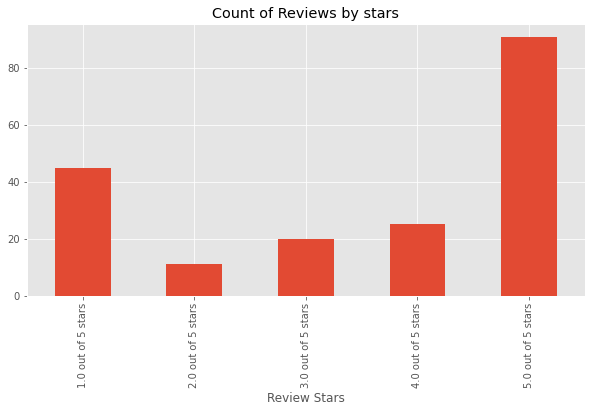

In [ ]:
ax = df['ratings'].value_counts().sort_index() \
    .plot(kind='bar', title = 'Count of Reviews by stars', figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

In [ ]:
# Basic nltk

example = df['description'][50]
print(example)

tagproduct


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['tagproduct']

In [ ]:
nltk.download('average_perceptron_tagger')

[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


False

punkt is used for tokenising sentences and **averaged_perceptron_tagger** is used for tagging words with their parts of speech (POS). We also need to set the add this directory to the NLTK data path.





POS Tagging in NLTK is a process to mark up the words in text format for a particular part of a speech based on its definition and context. Some NLTK POS tagging examples are: CC, CD, EX, JJ, MD, NNP, PDT, PRP$, TO, etc. POS tagger is used to assign grammatical information of each word of the sentence.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('tagproduct', 'NN')]

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk.chunk.api import ChunkParserI
from nltk.chunk.util import (ChunkScore)
from nltk.chunk.util import ChunkScore

In [ ]:
import nltk, re, pprint


In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S tagproduct/NN)


Step 1. VADER Seniment Scoring¶ We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach: Stop words are removed each word is scored and combined to a total score.

In [ ]:

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
type(sia)

nltk.sentiment.vader.SentimentIntensityAnalyzer

In [ ]:
sia.polarity_scores('It will give a nice look and very comfortable to wear!')

{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.7707}

In [ ]:
sia.polarity_scores('quality is fine. chain and the stones are looking pretty!!')

{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.6792}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm

In [ ]:


#run the polarity score on the entire dataset

res = {}
for i in tqdm(df.iterrows(), total=len(df)):
  text = row['text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)


  0%|          | 0/192 [00:00<?, ?it/s]


NameError: ignored

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.rest_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how= 'left')

AttributeError: ignored